In [16]:
from urllib2 import Request, urlopen, URLError
from xml.etree import ElementTree
import os, sys
import numpy as np
import astropy.io.ascii as ascii
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
%matplotlib inline 
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.io import fits
import astropy.units as u
from astropy.nddata.utils import Cutout2D
from astropy import coordinates
from astropy.coordinates import SkyCoord, Angle
from IPython.display import display,Image
import wget

# Get the inputs

In [17]:
ra = 271.012811
dec = -24.422041
#ra = 92.2639
#dec = 24.3297
name = 'EPIC_224338655'
apsize = 3.0
filetype = 'png'

### Find sign of the dec:

In [18]:
if (dec/np.abs(dec) == -1.0):
  sign = '%2D'
else:
  sign = '%2B'

In [19]:
fitsfile = "/Users/acody/Code/Python/M8_superstamp.fits"
# fitsfile = "/Users/acody/Code/Python/M35_superstamp.fits"
# fitsfile = "/Users/acody/Code/Python/M67_superstamp.fits"
# fitsfile = "/Users/acody/Code/Python/R147_superstamp.fits"
wcs = WCS(fitsfile)
scale = np.mean(proj_plane_pixel_scales(wcs))
angle = np.arctan2((wcs.wcs.cd[1,0])/scale,(wcs.wcs.cd[1,1])/scale)*180./np.pi
img = fits.getdata(fitsfile)
position = SkyCoord(ra, dec, unit=('deg','deg'), frame='icrs')
pixelpos = skycoord_to_pixel(position, wcs=wcs)
xval = pixelpos[0]
yval = pixelpos[1]

# Make finder from K2 superstamp

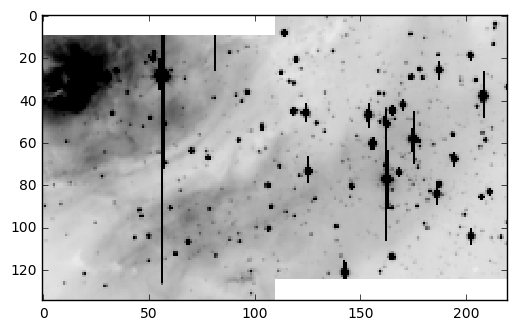

In [7]:
plt.imshow(img,cmap=cm.gray_r,vmin=0,vmax=15000,interpolation='nearest')

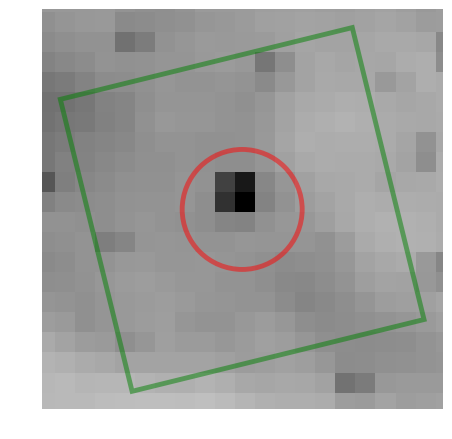

In [20]:
fig = plt.figure(frameon=False)
fig.set_size_inches(4,4)
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
ax.set_xlim(xval-10,xval+10)
ax.set_ylim(yval-10,yval+10)
ax.axis('off')
circ = Circle([xval,yval],apsize,facecolor='None', edgecolor = 'red', alpha=0.5, linewidth = 3.5)
rect = Rectangle([xval+15.0316*np.sqrt(2.)/2*np.cos(np.pi/180.*(225.-angle)),yval+15.0316*np.sqrt(2.)/2*np.sin(np.pi/180.*(225.-angle))], 15.0316,15.0316, edgecolor='green', facecolor='none', alpha=0.5, linewidth = 3.5, angle=-angle)
ax.add_patch(circ)
ax.add_patch(rect)
ax.imshow(img,cmap=cm.gray_r,vmin=0,vmax=15000,interpolation='nearest',aspect='normal')
plt.savefig(name+'_'+str(ra)+'_'+str(dec)+'.'+filetype)

## Rotate it so that north is up

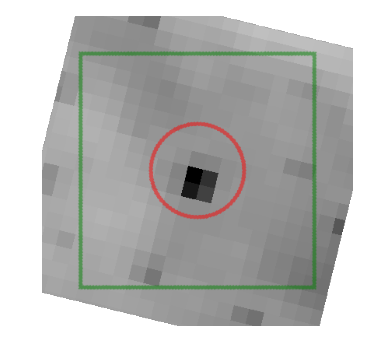

In [21]:
from PIL import Image as PILImage
im = PILImage.open(name+'_'+str(ra)+'_'+str(dec)+'.'+filetype)
plt.axis('off')
plt.imshow(np.asarray(im.rotate(angle)))

# Generate some finders from multiwavelength images

In [22]:
markersize = int(np.round(128.*2*apsize*3.976/60.))
url = 'https://irsa.ipac.caltech.edu/applications/finderchart/servlet/api?locstr='+str(ra)+'+'+sign+str(abs(dec))+'&subsetsize=1.0&marker=true&marker_color=red&marker_size='+str(markersize)
request = Request(url)

DSS:
DSS1 Blue


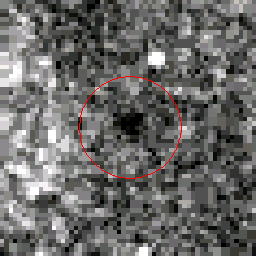

DSS:
DSS1 Red


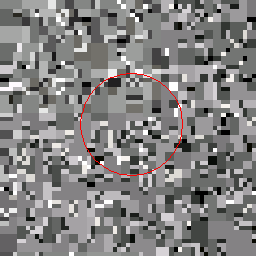

DSS:
DSS2 Red


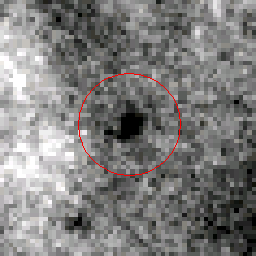

DSS:
DSS2 IR


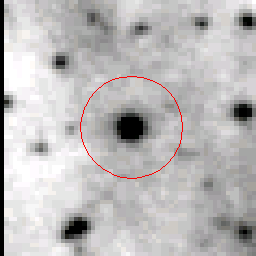

2MASS:
J


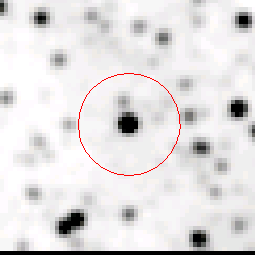

2MASS:
H


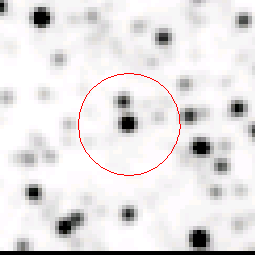

2MASS:
K


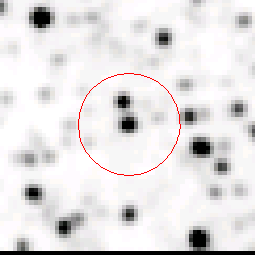

IRAS (IRIS):
12 microns


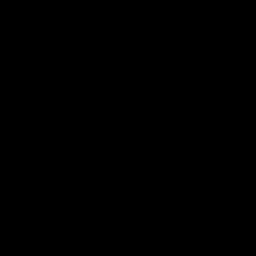

IRAS (IRIS):
25 microns


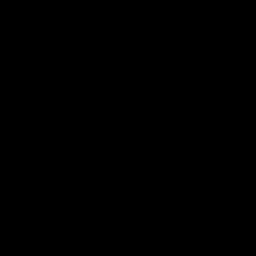

IRAS (IRIS):
60 microns


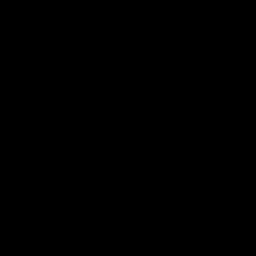

IRAS (IRIS):
100 microns


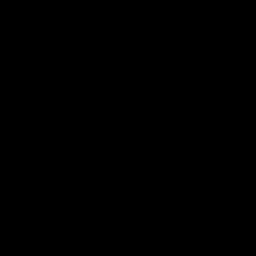

WISE (AllWISE):
w1


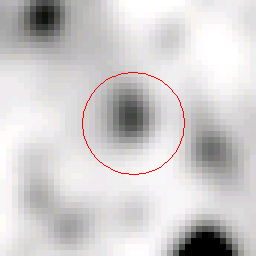

WISE (AllWISE):
w2


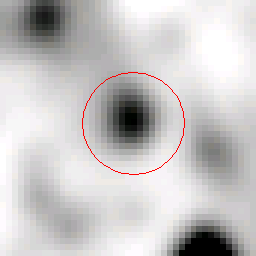

WISE (AllWISE):
w3


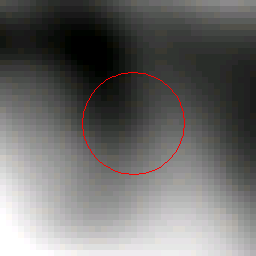

WISE (AllWISE):
w4


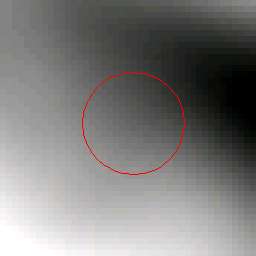

DSS:
2MASS:
2MASS:


In [23]:
try:
        response = urlopen(request)
        xmlpage = response.read()
        response.close()
        tree = ElementTree.fromstring(xmlpage)
        for node in tree.iter():
            for survey in node.findall('surveyname'):
              print survey.text+':'
            for band in node.findall('band'):
              print band.text
            for image in node.findall('jpgurl'):
              file = wget.download(image.text)
              newfile = name+file[2:]
              os.rename(file,newfile)
              display(Image(newfile))
            
except URLError, e:
        print 'No finders. Got an error code:', e